In [1]:
# Lab | Data cleaning and wrangling

In [2]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
categoricals = pd.read_csv('categorical.csv')
categoricals

,Unnamed: 0,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,policy_number,Year
0,0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,1,Agent,Two-Door Car,Medsize,3,2011
1,1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,3,Agent,Four-Door Car,Medsize,3,2011
2,2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,1,Agent,Two-Door Car,Medsize,3,2011
3,3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,1,Call Center,SUV,Medsize,2,2011
4,4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,1,Agent,Four-Door Car,Medsize,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,2,Web,Four-Door Car,Medsize,1,2011
9130,9130,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,1,Branch,Four-Door Car,Medsize,3,2011
9131,9131,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,1,Branch,Four-Door Car,Medsize,2,2011
9132,9132,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,3,Branch,Four-Door Car,Large,2,2011


In [4]:
categoricals.dtypes

Unnamed: 0            int64
State                object
Response             object
Coverage             object
Education            object
Effective To Date    object
EmploymentStatus     object
Gender               object
Location Code        object
Marital Status       object
Policy Type          object
Renew Offer Type      int64
Sales Channel        object
Vehicle Class        object
Vehicle Size         object
policy_number         int64
Year                  int64
dtype: object

In [5]:
#cleaning some columns in our categorical variables related to the last lab

categoricals['Renew Offer Type'] = categoricals['Renew Offer Type'].astype(str)

In [6]:
#cleaning some columns in our categorical variables related to the last lab

categoricals['policy_number'] = categoricals['policy_number'].astype(str)

In [7]:
#cleaning some columns in our categorical variables related to the last lab

categoricals['Year'] = categoricals['Year'].astype(str)

In [8]:
categoricals.dtypes

Unnamed: 0            int64
State                object
Response             object
Coverage             object
Education            object
Effective To Date    object
EmploymentStatus     object
Gender               object
Location Code        object
Marital Status       object
Policy Type          object
Renew Offer Type     object
Sales Channel        object
Vehicle Class        object
Vehicle Size         object
policy_number        object
Year                 object
dtype: object

In [9]:
#cleaning some columns in our categorical variables related to the last lab

categoricals.drop(columns=["Unnamed: 0"],axis=1,inplace=True)
categoricals

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,policy_number,Year
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,1,Agent,Two-Door Car,Medsize,3,2011
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,3,Agent,Four-Door Car,Medsize,3,2011
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,1,Agent,Two-Door Car,Medsize,3,2011
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,1,Call Center,SUV,Medsize,2,2011
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,1,Agent,Four-Door Car,Medsize,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,2,Web,Four-Door Car,Medsize,1,2011
9130,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,1,Branch,Four-Door Car,Medsize,3,2011
9131,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,1,Branch,Four-Door Car,Medsize,2,2011
9132,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,3,Branch,Four-Door Car,Large,2,2011


In [10]:
numericals = pd.read_csv('numerical.csv',index_col=0)
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [11]:
#1 - We will start with removing outliers. So far, we have discussed different methods to remove outliers. 
#Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers 
#and apply it to the dataframe.

In [12]:
def remove_outliers(numericals):
    #Calculate IQR from 'Income'
    iqr = np.percentile(numericals['income'],75) - np.percentile(numericals['income'],25)
    
    upper_limit1 = np.percentile(numericals['income'],75) + iqr*1.5
    lower_limit1 = np.percentile(numericals['income'],25) - iqr*1.5
    
    #Remove outliers from 'Income'
    numericals = numericals[(numericals['income'] > lower_limit1) & (numericals['income'] < upper_limit1)] 
    
    return numericals

In [13]:
noutliers_numericals = remove_outliers(numericals)

In [14]:
#Transform all the 0 in the 'income' column into the mean

noutliers_numericals['income'] = noutliers_numericals['income'].apply(lambda x: np.mean(noutliers_numericals['income']) if x == 0 else x)

In [15]:
noutliers_numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274.000000,69,32,5,0,1,384.811147
1,6979.535903,37657.380009,94,13,42,0,8,1131.464935
2,12887.431650,48767.000000,108,18,38,0,2,566.472247
3,7645.861827,37657.380009,106,18,65,0,7,529.881344
4,2813.692575,43836.000000,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941.000000,73,18,89,0,2,198.234764
9130,3096.511217,21604.000000,79,14,28,0,1,379.200000
9131,8163.890428,37657.380009,85,9,37,3,2,790.784983
9132,7524.442436,21941.000000,96,34,3,0,3,691.200000


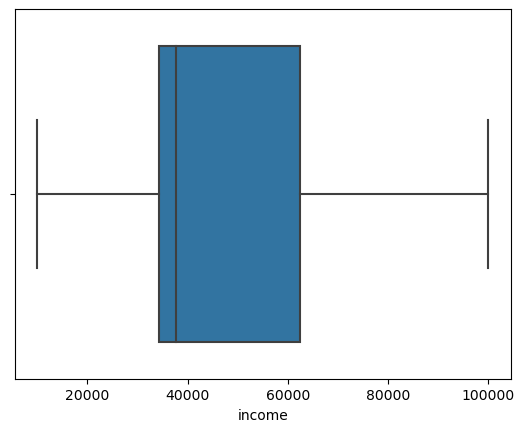

In [16]:
#'Income' column boxplot to show no outliers cleaned 

sns.boxplot(x=noutliers_numericals['income'])
plt.show()

In [17]:
#2 -Create a copy of the dataframe for the data wrangling.

In [18]:
categorical2 = categoricals.select_dtypes(include = object)

In [19]:
categorical2.dtypes

State                object
Response             object
Coverage             object
Education            object
Effective To Date    object
EmploymentStatus     object
Gender               object
Location Code        object
Marital Status       object
Policy Type          object
Renew Offer Type     object
Sales Channel        object
Vehicle Class        object
Vehicle Size         object
policy_number        object
Year                 object
dtype: object

In [20]:
noutliers_numericals['total_claim_amount'] = noutliers_numericals['total_claim_amount'].astype(int)

In [21]:
noutliers_numericals.dtypes

customer_lifetime_value          float64
income                           float64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount                 int32
dtype: object

In [22]:
numerical2 = noutliers_numericals.select_dtypes(include = int)

In [23]:
numerical2.dtypes

monthly_premium_auto             int64
months_since_last_claim          int64
months_since_policy_inception    int64
number_of_open_complaints        int64
number_of_policies               int64
total_claim_amount               int32
dtype: object

In [24]:
# 3 - Normalize the continuous variables. You can use any one method you want.

In [25]:
 def differentiate_variables(DataFrame):
    continuous_cols = []
    discrete_cols = []
    
    for col in numerical2.columns:
        if (DataFrame[col].nunique() <= 20):
            discrete_cols.append(col)
        else:
            continuous_cols.append(col)
    continuous_df = DataFrame[continuous_cols]
    discrete_df = DataFrame[discrete_cols]
    
    return continuous_df 

In [26]:
continuous_df = differentiate_variables(numerical2)

In [27]:
continuous_df

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,69,32,5,384
1,94,13,42,1131
2,108,18,38,566
3,106,18,65,529
4,73,12,44,138
...,...,...,...,...
9129,73,18,89,198
9130,79,14,28,379
9131,85,9,37,790
9132,96,34,3,691


In [28]:
X_num = continuous_df

In [29]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_num)
x_min_max = transformer.transform(X_num)
pd.DataFrame(x_min_max)

,0,1,2,3
0,0.033755,0.914286,0.050505,0.132734
1,0.139241,0.371429,0.424242,0.390944
2,0.198312,0.514286,0.383838,0.195645
3,0.189873,0.514286,0.656566,0.182855
4,0.050633,0.342857,0.444444,0.047701
...,...,...,...,...
9129,0.050633,0.514286,0.898990,0.068441
9130,0.075949,0.400000,0.282828,0.131006
9131,0.101266,0.257143,0.373737,0.273073
9132,0.147679,0.971429,0.030303,0.238852


In [30]:
#4 - Encode the categorical variables

In [31]:
categorical2.drop(columns=["Vehicle Size",'policy_number','Year'],axis=1,inplace=True)

In [32]:
categorical2

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Renew Offer Type,Sales Channel,Vehicle Class
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,1,Agent,Two-Door Car
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,3,Agent,Four-Door Car
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,1,Agent,Two-Door Car
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,1,Call Center,SUV
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,1,Agent,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,2,Web,Four-Door Car
9130,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,1,Branch,Four-Door Car
9131,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,1,Branch,Four-Door Car
9132,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,3,Branch,Four-Door Car


In [33]:
#Using one hot encoder

one_hot = pd.DataFrame(OneHotEncoder().fit(pd.DataFrame(categorical2)).transform(pd.DataFrame(categorical2)).toarray())

In [34]:
one_hot

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9130,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9131,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9132,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [35]:
#5 - The time variable can be useful. Try to transform its data into a useful one. 
#Hint: Day week and month as integers might be useful.

In [36]:
categorical2['Effective To Date']= pd.to_datetime(categorical2['Effective To Date'])

In [37]:
categorical2['Month Number'] = categorical2['Effective To Date'].dt.month

In [38]:
categorical2['Day of Week Number'] = categorical2['Effective To Date'].dt.dayofweek

In [39]:
categorical2

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Renew Offer Type,Sales Channel,Vehicle Class,Month Number,Day of Week Number
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,1,Agent,Two-Door Car,2,3
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,3,Agent,Four-Door Car,1,0
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,1,Agent,Two-Door Car,2,5
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,1,Call Center,SUV,1,3
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,1,Agent,Four-Door Car,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,2,Web,Four-Door Car,2,3
9130,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,1,Branch,Four-Door Car,2,5
9131,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,1,Branch,Four-Door Car,2,6
9132,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,3,Branch,Four-Door Car,2,3


In [50]:
numerical2.drop(['total_claim_amount'],axis=1,inplace=True)

In [42]:
#6 - Since the model will only accept numerical data, check and make sure that every column is numerical, 
#if some are not, change it using encoding.

#All my data is numerical, my r2 score is 0.76

In [51]:
X = pd.DataFrame(np.concatenate((numerical2, one_hot), axis=1))

In [57]:
Y = numerical2.reset_index(drop=True)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.4, random_state=100) 

In [54]:
model = sm.OLS(y_train, X_train).fit()

In [55]:
predictions = model.predict(X_test)

In [56]:
r2_score(y_test, predictions)

0.7672100448830228